<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cost (Loss) & Reward Functions**

In [1]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print(tf.__version__)

2.3.0


##### **Introduction**

$\min _{W}\left\{L(W):=\frac{1}{m} \sum_{i=1}^{m} \ell\left(W ; x_{i}, y_{i}\right)+\lambda r(W)\right\}$

Complete list of [Loss / Cost Functions in TF](https://www.tensorflow.org/api_docs/python/tf/keras/losses/)

https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f

https://towardsdatascience.com/what-is-loss-function-1e2605aeb904

https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error

https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f

### **Cost Functions for Time Series Forecasting**

##### **Root-Mean-Square Error (RMSE)**

* https://en.m.wikipedia.org/wiki/Root-mean-square_deviation

##### **Mean Absolute Deviation (MAD)**

* https://en.m.wikipedia.org/wiki/Average_absolute_deviation

##### **Mean Absolute Percentage Error (MAPE)**

* https://en.m.wikipedia.org/wiki/Mean_absolute_percentage_error

##### **Symmetric Mean Absolute Percentage Error (sMAPE)**

* https://en.m.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

### **Cost Functions for Regression**

![xx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/regression_loss.PNG)

##### **Mean Squared Error (L2 or Quadratic Loss)**

In [2]:
loss = 'mse'

* [Wikipedia](https://de.m.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate)

In [ ]:
def mse(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing square differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += (prediction - target)**2
        
    # Calculating mean and dividing by 2
    mae_error = (1.0 / (2*samples_num)) * accumulated_error
    
    return mae_error

##### **Mean Absolute Error (L1 Loss)**

In [ ]:
loss = 'mae'

* Computes the mean of absolute difference between labels and predictions.

In [ ]:
def mae(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing absolute differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += np.abs(prediction - target)
        
    # Calculating mean
    mae_error = (1.0 / samples_num) * accumulated_error
    
    return mae_error

**MSE vs MSE**

One big problem in using MAE loss (for neural nets especially) is that its gradient is the same throughout, which means the gradient will be large even for small loss values. This isn’t good for learning. To fix this, we can use dynamic learning rate which decreases as we move closer to the minima. MSE behaves nicely in this case and will converge even with a fixed learning rate. The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training (see figure below.)

![xx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/mae_vs_mse.PNG)

##### **Mean Squared Logarithmic Error (MSLR)**

* https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredLogarithmicError

##### **(normalized) sum of square error**

* https://de.m.wikipedia.org/wiki/Residuenquadratsumme

##### **Huber Loss (Smooth Mean Absolute Error)**

In [ ]:
loss = tf.keras.losses.Huber(
    delta=1.0, reduction=losses_utils.ReductionV2.AUTO, name='huber_loss'
)

![xx](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Huber_loss.svg/320px-Huber_loss.svg.png)

*Huber loss (green, 
δ
=
1) and squared error loss (blue) as a function of 
y
−
f
(
x
)*

$L_{\delta}(y, f(x))=\left\{\begin{array}{ll}
\frac{1}{2}(y-f(x))^{2} & \text { for }|y-f(x)| \leq \delta \\
\delta|y-f(x)|-\frac{1}{2} \delta^{2} & \text { otherwise }
\end{array}\right.$

* It's less sensitive to outliers in data than the squared error loss. It’s also differentiable at 0. It’s basically absolute error, which becomes quadratic when error is small.  How small that error has to be to make it quadratic depends on a hyperparameter 𝛿. Huber loss approaches MSE when 𝛿 ~ 0 and MAE when 𝛿 ~ ∞.

* The choice of delta is critical because it determines what you’re willing to consider as an outlier. Residuals larger than delta are minimized with L1 (which is less sensitive to large outliers), while residuals smaller than delta are minimized “appropriately” with L2.

* One big problem with using MAE for training of neural nets is its constantly large gradient, which can lead to missing minima at the end of training using gradient descent. For MSE, gradient decreases as the loss gets close to its minima, making it more precise.
Huber loss can be really helpful in such cases, as it curves around the minima which decreases the gradient. And it’s more robust to outliers than MSE. Therefore, **it combines good properties from both MSE and MAE**. 

* However, the problem with Huber loss is that we might need to train hyperparameter delta which is an iterative process.

* [Wiki](https://en.m.wikipedia.org/wiki/Huber_loss)

##### **Log-Cosh Loss**

In [ ]:
loss = tf.keras.losses.LogCosh()

* Log-cosh is another function used in regression tasks that’s smoother than L2
* Log-cosh is the logarithm of the hyperbolic cosine of the prediction error.
* [Wiki Hyperbolic Functions](https://en.m.wikipedia.org/wiki/Hyperbolic_functions), [TF Class](https://www.tensorflow.org/api_docs/python/tf/keras/losses/LogCosh)

##### **Quantile Loss (Pinball Loss)**

In [ ]:
loss = tfa.losses.PinballLoss(tau=.1)

![xx](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Pinball_Loss_Function.svg/320px-Pinball_Loss_Function.svg.png)

*Pinball-Verlustfunktion mit 
τ
=0,9. Für 
ε
<
0 beträgt der Fehler 
−
0
,
1
ε, für 
ε
≥
0 beträgt er 
0
,
9
ε.*

* estimates conditional “quantile” of a response variable given certain values of predictor variables
* is an extension of MAE (when quantile is 50th percentile, it’s MAE)
* Im Gegensatz zur Kleinste-Quadrate-Schätzung, die den Erwartungswert der Zielgröße schätzt, ist die Quantilsregression dazu geeignet, ihre Quantile zu schätzen. 
* [Wikipedia](https://de.m.wikipedia.org/wiki/Quantilsregression), [TF Class](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/PinballLoss) & [TF Function](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/pinball_loss)

### **Cost Functions for Classification**

##### **Binary Cross-Entropy**

##### **Categorical Cross Entropy**

##### **Sparse Cross-Entropy**

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss = 'sparse_categorical_crossentropy'

##### **Log-Loss (negative log-likelihood)**

##### **Exponential Loss**

##### **Hinge Loss**

##### **Kullback-Leibler Divergence**

In [ ]:
loss = kullback leibler

### **Reward Functions in Reinforcement Learning**

### **Define Model & Run**

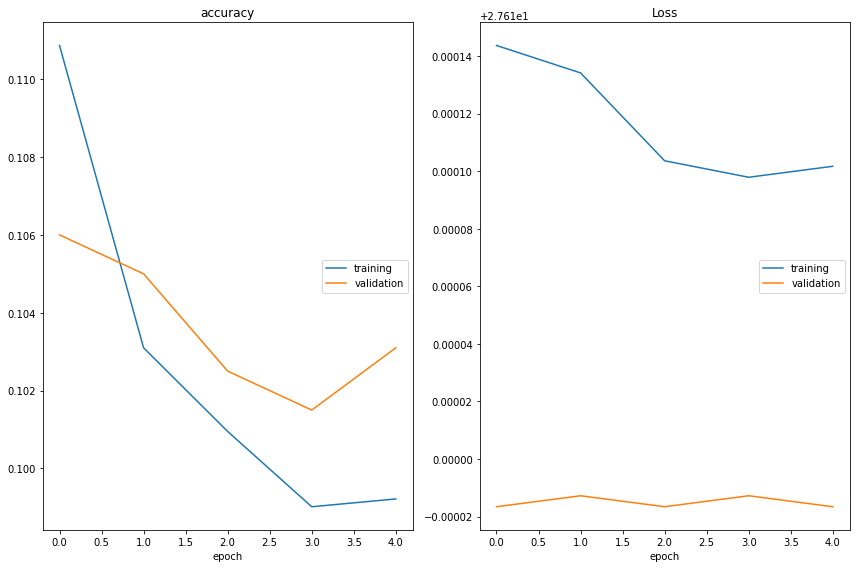

accuracy
	training         	 (min:    0.099, max:    0.111, cur:    0.099)
	validation       	 (min:    0.101, max:    0.106, cur:    0.103)
Loss
	training         	 (min:   27.610, max:   27.610, cur:   27.610)
	validation       	 (min:   27.610, max:   27.610, cur:   27.610)
1875/1875 [==============================] - 8s 4ms/step - loss: 27.6101 - accuracy: 0.0992 - val_loss: 27.6100 - val_accuracy: 0.1031


In [3]:
# Load & Prepare Data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam', 
              loss=loss, 
              metrics=['accuracy'])

# Train Model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)